<a href="https://colab.research.google.com/github/essieM/MLProjects/blob/master/Sentiment_Analysis_model_e_commerce_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#sklearn library contains a lot of efficient tools for ML and statistical modeling
# Including classification, regression, clustering and dimensionality reduction

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
import json
import pickle
import nltk
nltk.downloader.download('vader_lexicon')

import re
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Read the csv file that contains the corpus that we'll se to train our model
reviews_corpus_df = pd.read_csv('/content/Consumer_Reviews_of_Amazon_Products_ed.csv')

reviews_corpus_df.head()

,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,NaN
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,NaN
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,NaN
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,NaN
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,NaN


In [ ]:
# In this step, we need to remove the special characters, numbers from the text.
# We can use the regular expression operations library of Python.
def clean_text(text):
  text = re.sub(r'https?://\S+|www.\S+', '', text)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
  text = re.sub(r'[0-9]', '', text)
  text = text.lower()
  return text

In [ ]:
# In this step, we need to remove the special characters, numbers from the text.
# We can use the regular expression operations library of Python.


#I will now convert the text to all lowercase. Our machine learning algorithms recognize words
#that start with a capital letter as different words, and we will convert them to lowercase. Thus, our machine learning algorithms will not
#perceive words that start with a capital letter as a different word.

#cleaned_text = lambda x: re.sub("[^A-Za-z]+",' ',str(x))
#cleaned_text


reviews_corpus_df["reviewText"] = reviews_corpus_df["reviewText"].apply(clean_text)
#reviews_corpus_df["reviewText"] = reviews_corpus_df["reviewText"].str.lower()

reviews_corpus_df.head()



,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,NaN
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,NaN
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,NaN
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,NaN
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,NaN


In [ ]:
#Tokenization, POS tagging
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    #tags = pos_tag(word_tokenize(text))
    cleanText = clean_text(text)

    tags = pos_tag(word_tokenize(cleanText))

    newlist = []
    for word, tag in tags:
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

reviews_corpus_df['POS tagged'] = reviews_corpus_df['reviewText'].apply(token_stop_pos)
reviews_corpus_df.head()

# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment,POS tagged
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,NaN,"[(i, a), (order, n), (of, None), (them, None),..."
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,NaN,"[(bulk, n), (is, v), (always, r), (the, None),..."
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,NaN,"[(well, r), (they, None), (are, v), (not, r), ..."
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,NaN,"[(seem, n), (to, None), (work, v), (as, r), (w..."
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,NaN,"[(these, None), (batteries, n), (are, v), (ver..."


In [ ]:
#Obtaining the stem words – Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

reviews_corpus_df['Lemma'] = reviews_corpus_df['POS tagged'].apply(lemmatize)
reviews_corpus_df.head()

,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment,POS tagged,Lemma
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,NaN,"[(i, a), (order, n), (of, None), (them, None),...",i order of them and one of the item be bad q...
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,NaN,"[(bulk, n), (is, v), (always, r), (the, None),...",bulk be always the less expensive way to go ...
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,NaN,"[(well, r), (they, None), (are, v), (not, r), ...",well they be not duracell but for the price ...
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,NaN,"[(seem, n), (to, None), (work, v), (as, r), (w...",seem to work as well as name brand battery a...
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,NaN,"[(these, None), (batteries, n), (are, v), (ver...",these battery be very long last the price be...


In [ ]:

from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


#reviews_corpus_df = pd.DataFrame(mydata[['review', 'Lemma']])
#reviews_corpus_df['subjectivity'] = reviews_corpus_df['Lemma'].apply(getSubjectivity)
reviews_corpus_df['sentiment score'] = reviews_corpus_df['Lemma'].apply(getPolarity)
reviews_corpus_df['sentiment'] = reviews_corpus_df['sentiment score'].apply(analysis)
reviews_corpus_df.head()



,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment,POS tagged,Lemma,sentiment score
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,Negative,"[(i, a), (order, n), (of, None), (them, None),...",i order of them and one of the item be bad q...,-0.700000
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,Negative,"[(bulk, n), (is, v), (always, r), (the, None),...",bulk be always the less expensive way to go ...,-0.333333
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,Positive,"[(well, r), (they, None), (are, v), (not, r), ...",well they be not duracell but for the price ...,0.800000
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,Positive,"[(seem, n), (to, None), (work, v), (as, r), (w...",seem to work as well as name brand battery a...,0.700000
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,Positive,"[(these, None), (batteries, n), (are, v), (ver...",these battery be very long last the price be...,0.245000


In [ ]:
edited_reviews = reviews_corpus_df[reviews_corpus_df['sentiment'] != 'Neutral']
edited_reviews.head()


,id,name,rating,reviewText,reviewTitle,reviewerName,sentiment,POS tagged,Lemma,sentiment score
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,Negative,"[(i, a), (order, n), (of, None), (them, None),...",i order of them and one of the item be bad q...,-0.700000
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,Negative,"[(bulk, n), (is, v), (always, r), (the, None),...",bulk be always the less expensive way to go ...,-0.333333
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,Positive,"[(well, r), (they, None), (are, v), (not, r), ...",well they be not duracell but for the price ...,0.800000
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,Positive,"[(seem, n), (to, None), (work, v), (as, r), (w...",seem to work as well as name brand battery a...,0.700000
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,Positive,"[(these, None), (batteries, n), (are, v), (ver...",these battery be very long last the price be...,0.245000


In [ ]:
#The labels for this dataset are categorical. Machines understand only numeric data. So, convert the categorical values to
#numeric using the factorize() method. This returns an array of numeric values and an Index of categories.
sentiment_label = edited_reviews.sentiment.factorize()

sentiment_label



(array([0, 0, 1, ..., 1, 1, 1]),
 Index(['Negative', 'Positive'], dtype='object'))

In [ ]:
#We should transform our text data into something that our machine learning model understands.Basically, we need to convert
#the text into an array of vector embeddings. Word embeddings are a beautiful way of
#representing the relationship between the words in the text.To do this, we first give each of the unique words a unique
#number and then replace that word with the number assigned.

#First, retrieve all the text data from the dataset.


#feedback = edited_reviews.reviewText.values
cleaned_feedback = edited_reviews.reviewText.apply(clean_text)

feedback = cleaned_feedback.values
feedback


#let’s tokenize all the words in the text with the help of Tokenizer. In tokenization, we break down all the words/sentences
#of a text into small parts called tokens.

from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(feedback)
vocab_size = len(tokenizer.word_index) + 1



#The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form
#of a dictionary in the tokenizer.word_index attribute.

#Now, replace the words with their assigned numbers using the text_to_sequence() method.
#texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers.

encoded_docs = tokenizer.texts_to_sequences(feedback)

#Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length."""

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           310816    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 327,467
Trainable params: 327,467
Non-trainable params: 0
________________________________________________

In [ ]:
#Train the sentiment analysis model for 5 epochs on the whole dataset with a
#batch size of 32 and a validation split of 20%.
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=20, batch_size=32)



Epoch 1/20
464/657 [====================>.........] - ETA: 1:10 - loss: 0.0193 - accuracy: 0.9936

KeyboardInterrupt: ignored

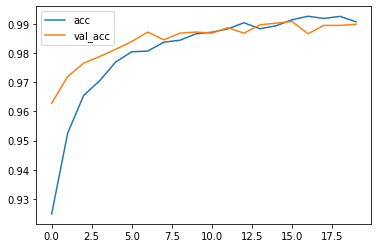

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "You'll waste your money buying this coat"
predict_sentiment(test_sentence1)

test_sentence2 = "I'm definitely going to be flying Delta again"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 375ms/step
Predicted label:  Negative
1/1 [==============================] - 0s 44ms/step
Predicted label:  Positive


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)


#vectorized_x = vectorizer.fit_transform(x)

reviews_corpus_df["reviewText"] = reviews_corpus_df["reviewText"].apply(clean_text)


x = reviews_corpus_df['reviewText']
y = reviews_corpus_df['sentiment']

vectorized_x = vectorizer.fit_transform(x)


#Instantiate the random forest classifier
rf_classifier = RandomForestClassifier()
#Pass the vectorized body and our sentiment to the classifier
rf_classifier.fit(vectorized_x, y)

RandomForestClassifier()

In [ ]:
#Let's save our classifier as a pickle dump/file

pickle.dump(rf_classifier, open('e-commerce_sentiment_classifier.pkl', 'wb'))
pickle.dump(vectorizer, open('e-commerce_sentiment_vectorizer.pkl', 'wb'))